In [6]:
import pandas as pd

In [7]:
df_aqi=pd.read_csv('Banglore_AQI_Daily.csv')
df_weather=pd.read_csv('Weather.csv')

In [8]:
df_aqi["date"]=pd.to_datetime(df_aqi["date"],format="%d-%m-%Y")
df_weather["date"]=pd.to_datetime(df_weather["date"],format="%d-%m-%Y")

In [9]:
df=df_weather.merge(df_aqi,on="date", how="inner")
if 'location' in df.columns:
    df=df.drop(columns=['location'])
    
df=df.sort_values(by='date')
df=df.reset_index(drop=True)

print(df.head())

        date  temperature_2m  relative_humidity_2m  wind_speed_10m  \
0 2022-08-04       21.632431              89.35437       12.940038   
1 2022-08-05       20.836597              90.30252       24.310541   
2 2022-08-06       21.637291              86.49367       22.502295   
3 2022-08-07       21.553959              87.30295       23.026426   
4 2022-08-08       22.057777              81.98119       26.003330   

   surface_pressure  precipitation  pm10  pm2_5  carbon_monoxide  \
0         907.64450     141.100000  12.5    8.7            251.1   
1         908.07870      89.600000   6.0    4.2            163.9   
2         907.74460      45.300000   7.0    4.9            169.9   
3         907.16504      27.800001   7.6    5.3            171.4   
4         907.02527      18.100000   5.8    3.9            141.5   

   nitrogen_dioxide  sulphur_dioxide  ozone  AQI  
0              14.3              3.6   45.3   15  
1               9.6              1.8   37.9    7  
2              10

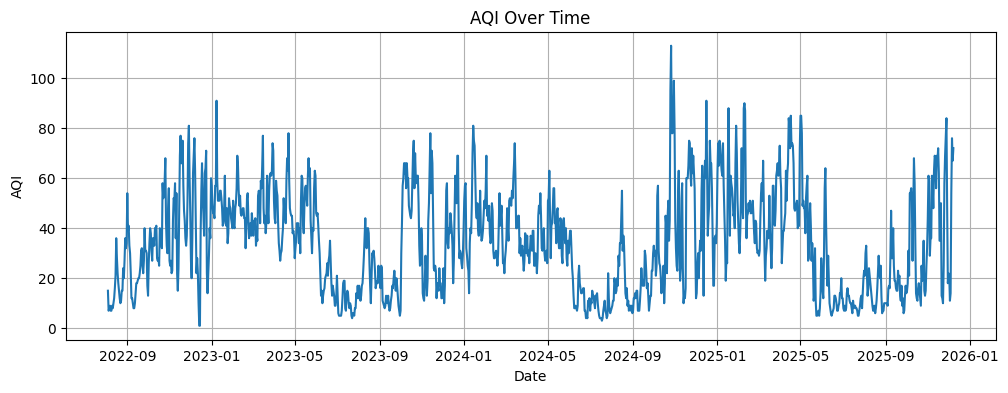

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df["date"], df["AQI"])
plt.title("AQI Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.grid(True)
plt.show()


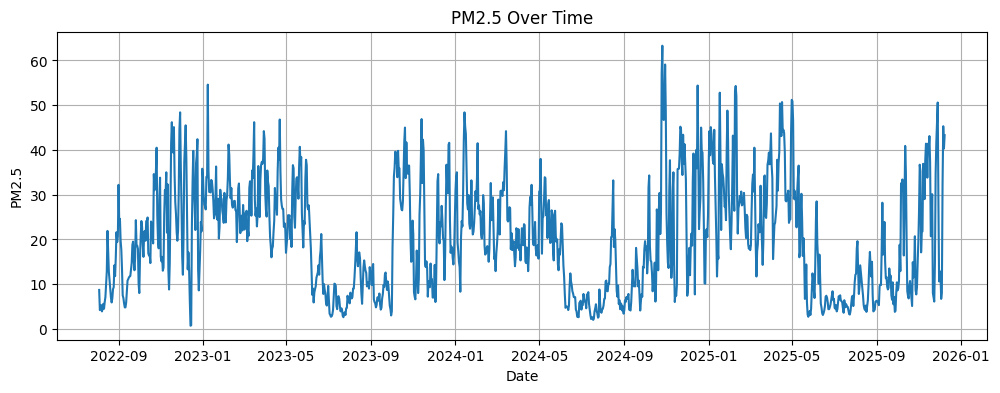

In [11]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["pm2_5"])
plt.title("PM2.5 Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()


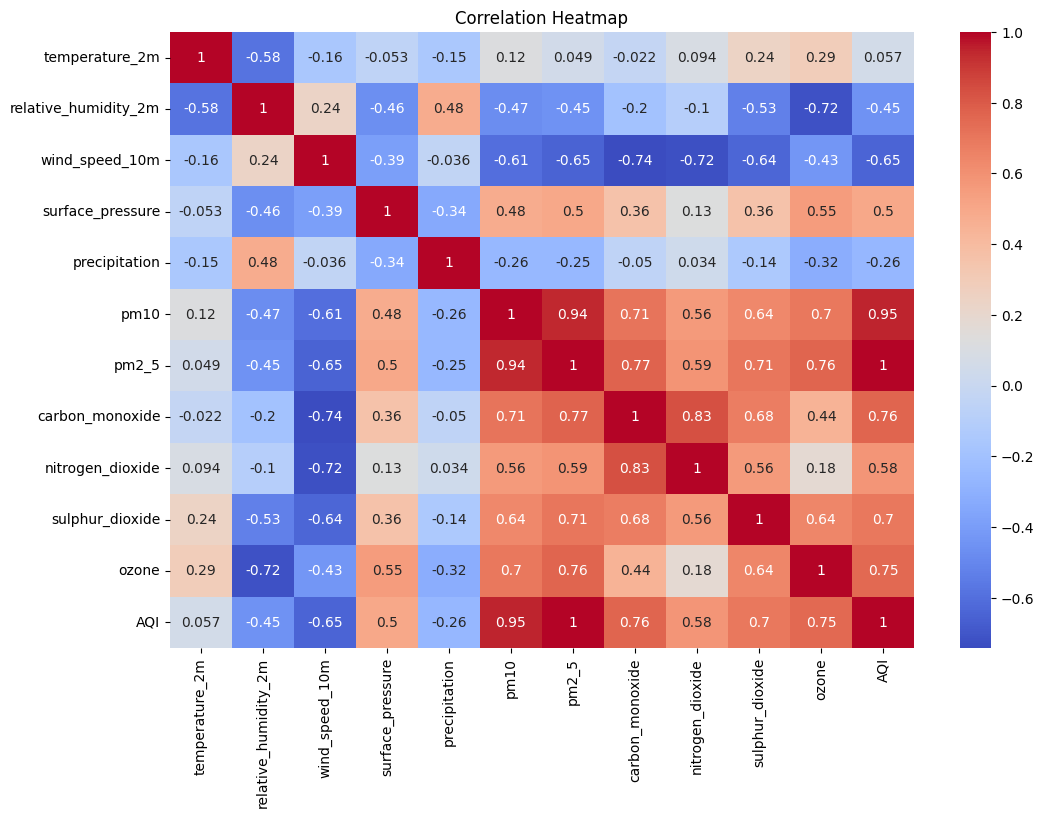

In [12]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


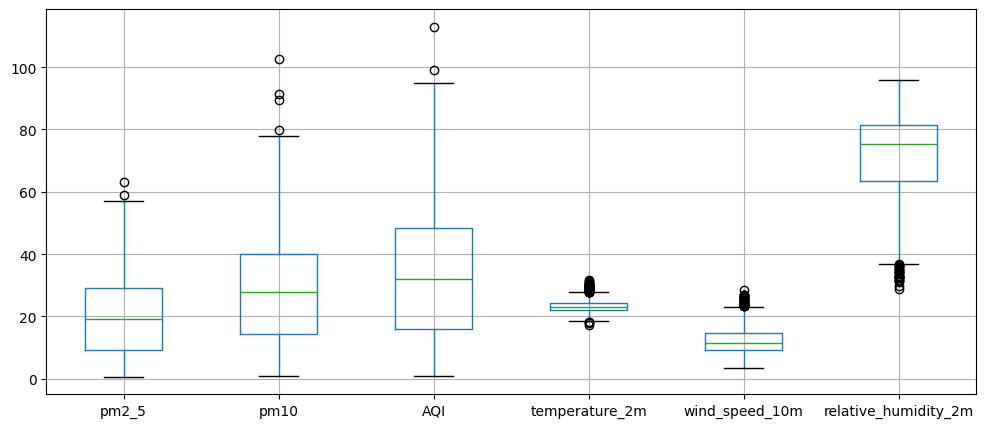

In [13]:
df[["pm2_5","pm10","AQI","temperature_2m","wind_speed_10m","relative_humidity_2m"]].boxplot(figsize=(12,5))
plt.show()


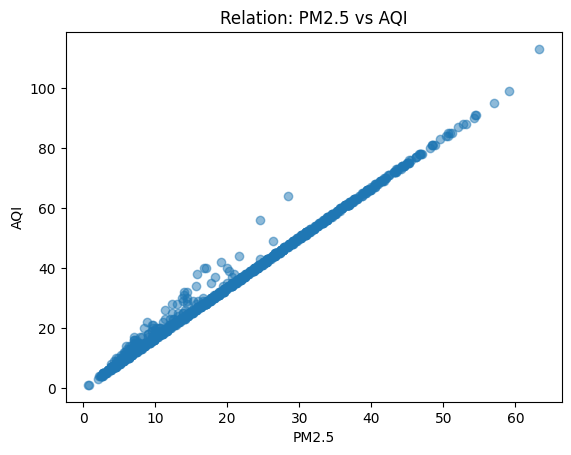

In [14]:
plt.scatter(df["pm2_5"], df["AQI"], alpha=0.5)
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.title("Relation: PM2.5 vs AQI")
plt.show()


In [15]:
import numpy as np
df["dayofyear"]=df["date"].dt.dayofyear
df["sin_doy"]=np.sin(2 * np.pi * df["dayofyear"] / 365)
df["cos_doy"]=np.cos(2 * np.pi * df["dayofyear"] / 365)

In [16]:
df["pm2_5_lag1"]=df["pm2_5"].shift(1)
df["pm2_5_lag7"]=df["pm2_5"].shift(7)
df['temperature_2m_ma7']=df["temperature_2m"].rolling(window=7).mean()
df['temperature_2m_ma14']=df["temperature_2m"].rolling(window=14).mean()
df['temperature_2m_lag1']=df["temperature_2m"].shift(1)
df['temperature_2m_lag7']=df["temperature_2m"].shift(7)

df['humidity_2m_ma7']=df["relative_humidity_2m"].rolling(window=7).mean()
df['humidity_2m_ma14']=df["relative_humidity_2m"].rolling(window=14).mean()
df['humidity_2m_lag1']=df["relative_humidity_2m"].shift(1)
df['humidity_2m_lag7']=df["relative_humidity_2m"].shift(7)

df['wind_speed_10m_ma7']=df["wind_speed_10m"].rolling(window=7).mean()
df['wind_speed_10m_ma14']=df["wind_speed_10m"].rolling(window=14).mean()
df['wind_speed_10m_lag1']=df["wind_speed_10m"].shift(1)
df['wind_speed_10m_lag7']=df["wind_speed_10m"].shift(7)

df['precipitation_ma7']=df["precipitation"].rolling(window=7).mean()
df['precipitation_ma14']=df["precipitation"].rolling(window=14).mean()
df['precipitation_lag1']=df["precipitation"].shift(1)
df['precipitation_lag7']=df["precipitation"].shift(7)

df['surface_pressure_ma7']=df["surface_pressure"].rolling(window=7).mean()
df['surface_pressure_ma14']=df["surface_pressure"].rolling(window=14).mean()
df['surface_pressure_lag1']=df["surface_pressure"].shift(1)
df['surface_pressure_lag7']=df["surface_pressure"].shift(7)

In [17]:
df["pm2_5_ma7"]=df["pm2_5"].rolling(window=7).mean()
df["pm2_5_ma14"]=df["pm2_5"].rolling(window=14).mean()
df=df.dropna().reset_index(drop=True)
df = df.drop("AQI", axis=1)

df.to_csv('MergedData.csv', index=False)